# 1. Configuracion complex

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

# with open("input-multiLaneWithObstacle.json") as json_file:
with open("input-multiLaneWithObstacle.json") as json_file:    
    json_data = json.load(json_file)
    #print(json_data)
    
json_data

{u'carPerUpdate': 10,
 u'laneChangeProbability': 0.2,
 u'lanes': 4,
 u'lenght': 190,
 u'maxLength': 1000,
 u'maxSpeed': 5.0,
 u'slowDownProbability': 0.3}

In [3]:
data = pd.read_csv('output-multiLaneWithObstacle.csv', sep=",")
# data = pd.read_csv('output-trafico-8am.csv', sep=",")
#data = pd.read_csv('output.csv', sep=",")
data[1:20]

,queue,totalCars,deadCars,flux,density,avgSpeedCars,time
1,4,8,0,4.34,1.05,4.12,2
2,5,12,0,5.53,1.58,3.50,3
3,4,16,0,6.45,2.11,3.06,4
4,7,18,0,7.76,2.37,3.28,5
5,12,20,0,8.16,2.63,3.10,6
6,19,21,0,9.47,2.76,3.43,7
7,22,22,0,9.87,2.89,3.41,8
8,29,24,0,11.45,3.16,3.62,9
9,28,26,0,12.24,3.42,3.58,10
10,32,27,0,12.37,3.55,3.48,11


### Estadisticas simples de la data

In [4]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
description = data.describe()
description

,queue,totalCars,deadCars,flux,density,avgSpeedCars,time
count,840.000,840.000,840.000,840.000,840.000,840.000,840.000
mean,1457.493,122.783,565.432,35.688,16.156,2.287,420.500
std,838.376,22.625,355.179,4.755,2.977,0.471,242.631
min,1.000,4.000,0.000,2.500,0.530,1.570,1.000
25%,747.000,118.750,253.500,34.470,15.628,1.980,210.750
50%,1451.000,130.000,577.000,36.320,17.110,2.150,420.500
75%,2173.000,135.000,874.750,38.160,17.760,2.420,630.250
max,2955.000,146.000,1173.000,42.760,19.210,4.750,840.000


### Graficas


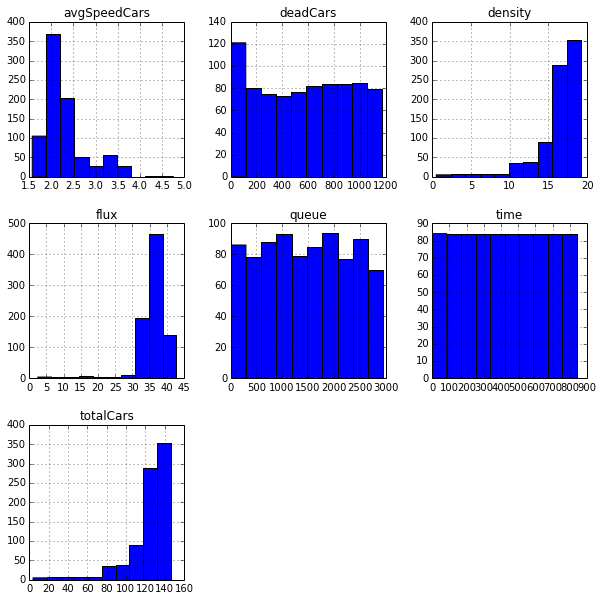

In [9]:
data.hist(figsize = (10, 10))
plt.show()

In [3]:
#Se quita la columna tiempo
#data.drop('time', axis=1, inplace=True)
data.drop('queue', axis=1, inplace=True)

In [14]:
data[100:140]

,deadCars,flux,time,avgSpeedCars,density,totalCars
100,31,16.82,101,2.11,7.95,70
101,33,15.45,102,2.00,7.73,68
102,35,15.23,103,2.03,7.50,66
103,35,16.70,104,2.19,7.61,67
104,37,17.27,105,2.30,7.50,66
105,38,20.00,106,2.71,7.39,65
106,39,21.93,107,2.97,7.39,65
107,39,24.77,108,3.25,7.61,67
108,39,25.45,109,3.25,7.84,69
109,39,26.02,110,3.23,8.07,71


In [4]:
description = data.describe()
description

,time,avgSpeedCars,deadCars,flux,totalCars,density
count,4022068.000000,4022068.000000,4022068.000000,4022068.000000,4022068.000000,4022068.000000
mean,2011034.500000,3.454272,1005368.909051,12.333639,31.586294,3.589389
std,1161071.165587,0.605109,580613.840925,2.487408,4.486454,0.509769
min,1.000000,1.120000,0.000000,0.450000,1.000000,0.110000
25%,1005517.750000,2.960000,502557.750000,10.570000,29.000000,3.300000
50%,2011034.500000,3.550000,1005392.000000,12.390000,32.000000,3.640000
75%,3016551.250000,3.970000,1508266.000000,14.090000,35.000000,3.980000
max,4022068.000000,5.000000,2010955.000000,22.390000,52.000000,5.910000


In [8]:
#data.drop('time', axis=1, inplace=True)
#print(data.head(10))
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

### BoxPlots

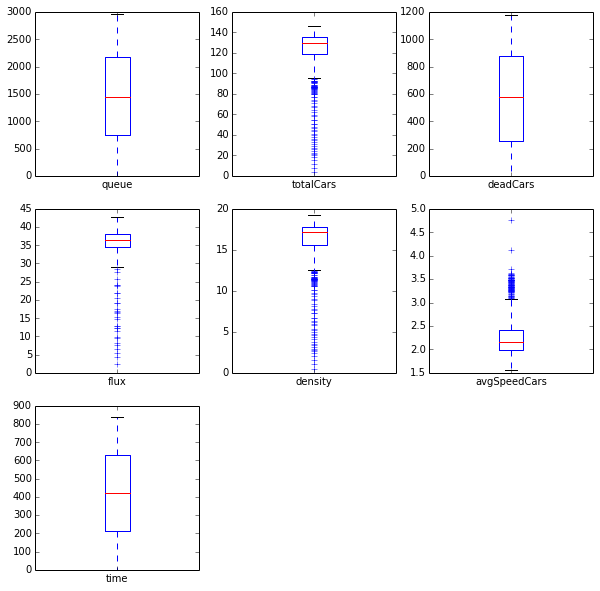

In [10]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize = (10, 10))
plt.show()

### Correlaciones

['queue', 'totalCars', 'deadCars', 'flux', 'density', 'avgSpeedCars', 'time']


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


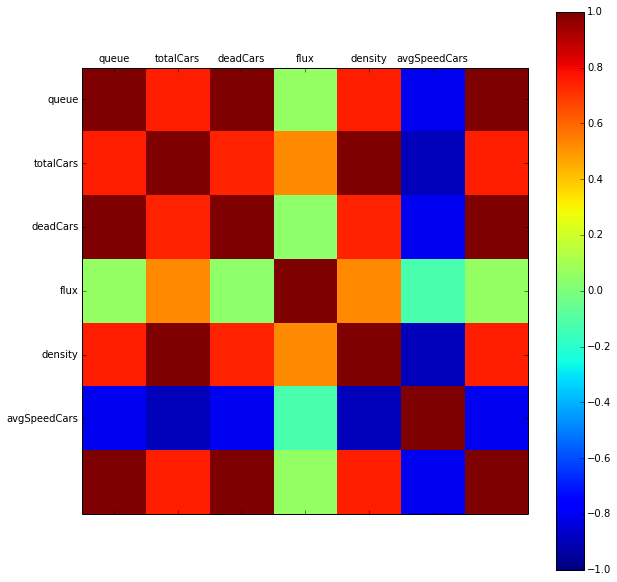

In [12]:
names = list(data.columns.values)
print names
correlations = data.corr()
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

### Scatter Plot Matrix

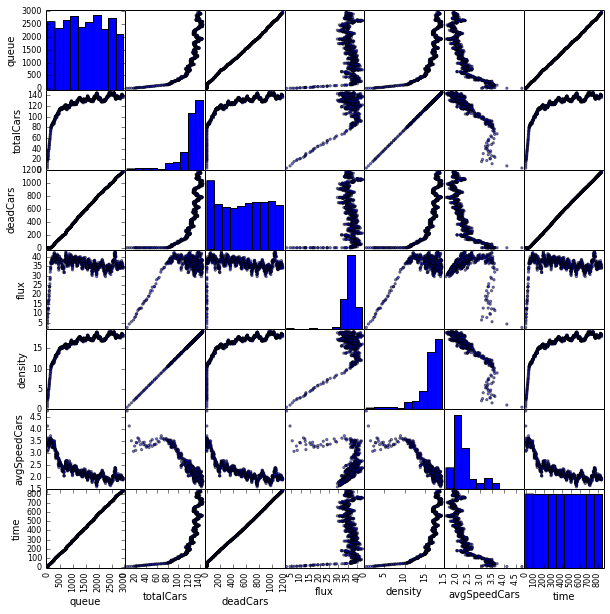

In [13]:
from pandas.tools.plotting import scatter_matrix

#plt.figure(figsize=(15, 15))
scatter_matrix(data, figsize = (10, 10))
plt.savefig('hola.png')
plt.show()

### Plotear tiempos de ejecucion